<a href="https://colab.research.google.com/github/icsd13152/TextExtraction_from_image/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install gtts
# !pip install easyocr

import nltk
import re
from textblob import TextBlob
import spacy
from gtts import gTTS
import os
from spacy import displacy 
import cv2
# import pytesseract
import numpy as np
from nltk.stem import WordNetLemmatizer
import easyocr
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from tabulate import tabulate
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Digital Image

In [152]:
reader = easyocr.Reader(['en'], gpu=False)
images = ['essay2.jpg']
Docs = list()

for img in images:
    result = reader.readtext(img)
    Docs.append(result)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[241, 69], [483, 69], [483, 87], [241, 87]], 'A SAMPLE NARRATI VE ESSAY', 0.9569314296340108), ([[247, 103], [291, 103], [291, 123], [247, 123]], 'How', 0.39538285827717845), ([[307, 105], [405, 105], [405, 123], [307, 123]], 'LEARNT SW', 0.9495423554616853), ([[413, 103], [475, 103], [475, 123], [413, 123]], 'MMING', 0.863746796964546), ([[111, 143], [177, 143], [177, 161], [111, 161]], 'Learning', 0.8298929946048572), ([[181, 145], [213, 145], [213, 159], [181, 159]], 'som', 0.9995385391863337), ([[210, 141], [261, 141], [261, 161], [210, 161]], 'ething', 0.9983628761267458), ([[265, 145], [297, 145], [297, 159], [265, 159]], 'new', 0.9985739339727985), ([[301, 143], [355, 143], [355, 159], [301, 159]], 'can be', 0.9970090310752433), ([[373, 141], [501, 141], [501, 161], [373, 161]], 'scary experience', 0.6085282702065739), ([[511, 143], [543, 143], [543, 159], [511, 159]], 'One', 0.9999343407470955), ([[547, 143], [657, 143], [657, 159], [547, 159]], 'of the hardest', 0.996394622

In [153]:
# font = cv2.FONT_HERSHEY_SIMPLEX
documents = list()
confidence = list()
# print(Docs)
for content in Docs:
    # print(content)
    tmpList = list()
    for text in content:
        tmpList.append(text[1])
        confidence.append((text[1],text[2]))
      
    documents.append(tmpList)
print(confidence) 
# print(documents)
finalDocs = list()
for d in documents:
    finalDocs.append(' '.join(i for i in d))

# finalDoc = ' '.join(i for i in document)
print(finalDocs)

# img = cv2.imread('Instagram.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()
# img = cv2.imread('annie-spratt-askpr0s66Rg-unsplash.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

[('A SAMPLE NARRATI VE ESSAY', 0.9569314296340108), ('How', 0.39538285827717845), ('LEARNT SW', 0.9495423554616853), ('MMING', 0.863746796964546), ('Learning', 0.8298929946048572), ('som', 0.9995385391863337), ('ething', 0.9983628761267458), ('new', 0.9985739339727985), ('can be', 0.9970090310752433), ('scary experience', 0.6085282702065739), ('One', 0.9999343407470955), ('of the hardest', 0.9963946224758808), ("things |'ve", 0.4667817797935693), ('ever had', 0.9306990762389464), ('was learn', 0.9457499355064752), ('how t0', 0.9269350398704967), ('swim', 0.9960963129997253), ('was always afraid', 0.8140003986123772), ('of the', 0.9911070373647499), ('water', 0.9975142289246097), ('but', 0.9991234208996911), ('decided that swimming was an important skill that', 0.8793004587807316), ('should Iearn;', 0.7473538622463255), ('also thought', 0.9959235402037263), ('would', 0.999525723037533), ('be good', 0.9906988697603052), ('exercise', 0.9333733060738257), ('and', 0.9999953198664192), ('hel

In [154]:
def getBestScore(scores,threshold=0.80):
    best = list()
    counter = 0
    for text, score in scores:
        if score >= threshold:
            counter += 1
            best.append((text,score))
    return (best,counter,len(scores))

In [155]:
bestFoundWords, totalBest, total= getBestScore(confidence,threshold=0.85)

print("With this threshold found ",totalBest, " words from ",total)


With this threshold found  159  words from  212


# Text Analysis using NLTK

In [156]:
# tokensNLTK = list()
# for sete in finalDocs:
tokensNLTK = nltk.tokenize.word_tokenize(finalDocs[0])
print(tokensNLTK)
nltk.pos_tag(tokensNLTK)

['A', 'SAMPLE', 'NARRATI', 'VE', 'ESSAY', 'How', 'LEARNT', 'SW', 'MMING', 'Learning', 'som', 'ething', 'new', 'can', 'be', 'scary', 'experience', 'One', 'of', 'the', 'hardest', 'things', '|', "'ve", 'ever', 'had', 'was', 'learn', 'how', 't0', 'swim', 'was', 'always', 'afraid', 'of', 'the', 'water', 'but', 'decided', 'that', 'swimming', 'was', 'an', 'important', 'skill', 'that', 'should', 'Iearn', ';', 'also', 'thought', 'would', 'be', 'good', 'exercise', 'and', 'help', 'me', 'become', 'physically', 'stronger_', 'What', 'did', "n't", 'realize', 'was', 'that', 'learning', 'to', 'swim', 'would', 'also', 'make', 'me', 'a', 'more', 'confident', 'person_', 'New', 'situations', 'always', 'make', 'me', 'nervous', 'and', 'my', 'first', 'swimming', 'lesson', 'was', 'no', 'exception', '.', 'After', 'changed', 'into', 'my', 'bathing', 'the', 'locker', 'room', 'stood', 'timidly', 'by', 'the', 'side', 'of', 'the', 'pool', 'waiting', 'for', 'the', 'teacher', 'and', 'other', 'students', 't0', 'show', 

[('A', 'DT'),
 ('SAMPLE', 'NNP'),
 ('NARRATI', 'NNP'),
 ('VE', 'NNP'),
 ('ESSAY', 'NNP'),
 ('How', 'NNP'),
 ('LEARNT', 'NNP'),
 ('SW', 'NNP'),
 ('MMING', 'NNP'),
 ('Learning', 'NNP'),
 ('som', 'VBD'),
 ('ething', 'VBG'),
 ('new', 'JJ'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('scary', 'JJ'),
 ('experience', 'NN'),
 ('One', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('hardest', 'JJS'),
 ('things', 'NNS'),
 ('|', 'VBP'),
 ("'ve", 'VBP'),
 ('ever', 'RB'),
 ('had', 'VBN'),
 ('was', 'VBD'),
 ('learn', 'JJ'),
 ('how', 'WRB'),
 ('t0', 'JJ'),
 ('swim', 'NN'),
 ('was', 'VBD'),
 ('always', 'RB'),
 ('afraid', 'VBN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('water', 'NN'),
 ('but', 'CC'),
 ('decided', 'VBD'),
 ('that', 'IN'),
 ('swimming', 'NN'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('important', 'JJ'),
 ('skill', 'NN'),
 ('that', 'WDT'),
 ('should', 'MD'),
 ('Iearn', 'NNP'),
 (';', ':'),
 ('also', 'RB'),
 ('thought', 'VBD'),
 ('would', 'MD'),
 ('be', 'VB'),
 ('good', 'JJ'),
 ('exercise', 'NN'),
 ('and', 'CC'),
 ('help

# Text Analysis using SpaCy

In [157]:

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# create spacy 
tokensSpacy1 = nlp(finalDocs[0])
tokensSpacy = list()
for token in tokensSpacy1:
    print(token.text,'->',token.pos_)
    tokensSpacy.append(token.text)

A -> DET
SAMPLE -> PROPN
NARRATI -> PROPN
VE -> PROPN
ESSAY -> PROPN
How -> ADV
LEARNT -> PROPN
SW -> PROPN
MMING -> PROPN
Learning -> PROPN
som -> NOUN
ething -> VERB
new -> ADJ
can -> VERB
be -> AUX
scary -> ADJ
experience -> NOUN
One -> NUM
of -> ADP
the -> DET
hardest -> ADJ
things -> NOUN
|'ve -> PROPN
ever -> ADV
had -> AUX
was -> AUX
learn -> VERB
how -> ADV
t0 -> PROPN
swim -> NOUN
was -> AUX
always -> ADV
afraid -> ADJ
of -> ADP
the -> DET
water -> NOUN
but -> CCONJ
decided -> VERB
that -> SCONJ
swimming -> NOUN
was -> AUX
an -> DET
important -> ADJ
skill -> NOUN
that -> DET
should -> VERB
Iearn -> VERB
; -> PUNCT
also -> ADV
thought -> VERB
would -> VERB
be -> AUX
good -> ADJ
exercise -> NOUN
and -> CCONJ
help -> VERB
me -> PRON
become -> VERB
physically -> ADV
stronger -> ADJ
_ -> PROPN
What -> PRON
did -> AUX
n't -> PART
realize -> VERB
was -> AUX
that -> SCONJ
learning -> VERB
to -> PART
swim -> VERB
would -> VERB
also -> ADV
make -> VERB
me -> PRON
a -> DET
more -> ADV
co

# Text Analysis using Custom Tokenizer

In [158]:
def customTokenizer(text):
    pattern = re.compile(r'(?:[A-Z]\.)+|[A-Za-z]+\.|\d+(?:[\./]\d+)|n\'t|\b\w+(?!\'t)|\w+(?:-\w+)*|[!\"#$%&\'()*+,./:;<=>?@[\]^_`{|}~]|-{2}')  
    tmpTokens = pattern.findall(text)
    tokens = list()
    for i in tmpTokens:
        i = i.strip()
        i = i.replace('/','\\/')
        tokens.append(i)
    
    return tokens

tokensCustom = customTokenizer(finalDocs[0])
print(tokensCustom)

['A', 'SAMPLE', 'NARRATI', 'VE', 'ESSAY', 'How', 'LEARNT', 'SW', 'MMING', 'Learning', 'som', 'ething', 'new', 'can', 'be', 'scary', 'experience', 'One', 'of', 'the', 'hardest', 'things', '|', "'", 've', 'ever', 'had', 'was', 'learn', 'how', 't0', 'swim', 'was', 'always', 'afraid', 'of', 'the', 'water', 'but', 'decided', 'that', 'swimming', 'was', 'an', 'important', 'skill', 'that', 'should', 'Iearn', ';', 'also', 'thought', 'would', 'be', 'good', 'exercise', 'and', 'help', 'me', 'become', 'physically', 'stronger_', 'What', 'did', "n't", 'realize', 'was', 'that', 'learning', 'to', 'swim', 'would', 'also', 'make', 'me', 'a', 'more', 'confident', 'person_', 'New', 'situations', 'always', 'make', 'me', 'nervous', 'and', 'my', 'first', 'swimming', 'lesson', 'was', 'no', 'exception.', 'After', 'changed', 'into', 'my', 'bathing', 'the', 'locker', 'room', 'stood', 'timidly', 'by', 'the', 'side', 'of', 'the', 'pool', 'waiting', 'for', 'the', 'teacher', 'and', 'other', 'students', 't0', 'show', 

In [159]:
def getGroundsFromFile(path, tokenizer = 'NLTK'):
    path = 'essay2.txt'
    tokens = list()
    nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
    with open(path,'r') as f:
        text = f.read()
        tokensWordTokenize = nltk.tokenize.word_tokenize(text)
        docSpacy = nlp(text)
    tokensSpacy = list()
    for token in docSpacy:
        tokensSpacy.append(token.text)
    if tokenizer == 'NLTK':
        tokens = tokensWordTokenize
    else:
        tokens =  tokensSpacy   
    return tokens

In [160]:
tokensGroundNLTK = getGroundsFromFile('es2.txt', tokenizer = 'NLTK')
tokensGroundSpacy = getGroundsFromFile('es2.txt', tokenizer = 'Spacy')

# Lemmatization

In [161]:
def funclemmatize(tokens):
    lemmatizer = WordNetLemmatizer()


    for token in tokens:
        print(token, '->', lemmatizer.lemmatize(token))

In [162]:
print("=============NLTK==============")
funclemmatize(tokensNLTK)
print("=============SpaCy==============")
funclemmatize(tokensSpacy)
# funclemmatize(correctedTextblob)
print("=============Custom==============")
funclemmatize(tokensCustom)

=============NLTK==============
A -> A
SAMPLE -> SAMPLE
NARRATI -> NARRATI
VE -> VE
ESSAY -> ESSAY
How -> How
LEARNT -> LEARNT
SW -> SW
MMING -> MMING
Learning -> Learning
som -> som
ething -> ething
new -> new
can -> can
be -> be
scary -> scary
experience -> experience
One -> One
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> 've
ever -> ever
had -> had
was -> wa
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> wa
always -> always
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decided
that -> that
swimming -> swimming
was -> wa
an -> an
important -> important
skill -> skill
that -> that
should -> should
Iearn -> Iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercise
and -> and
help -> help
me -> me
become -> become
physically -> physically
stronger_ -> stronger_
What -> What
did -> did
n't -> n't
realize -> realize
was -> wa
that -> that
learning -> learning
to -> to
swim -> swim
wou

# Stemming with PorterStemmer

In [163]:


def porterStem(tokens): 
    ps = PorterStemmer()
#     tokenss = customTokenizer(sntnc)

    for token in tokens:
        print(token, '->', ps.stem(token))

In [164]:
print("=============NLTK==============")
porterStem(tokensNLTK)
print("=============Spacy==============")
porterStem(tokensSpacy)
# porterStem(correctedTextblob)
print("=============Custom==============")
porterStem(tokensCustom)

=============NLTK==============
A -> A
SAMPLE -> sampl
NARRATI -> narrati
VE -> VE
ESSAY -> essay
How -> how
LEARNT -> learnt
SW -> SW
MMING -> mming
Learning -> learn
som -> som
ething -> eth
new -> new
can -> can
be -> be
scary -> scari
experience -> experi
One -> one
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> 've
ever -> ever
had -> had
was -> wa
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> wa
always -> alway
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decid
that -> that
swimming -> swim
was -> wa
an -> an
important -> import
skill -> skill
that -> that
should -> should
Iearn -> iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercis
and -> and
help -> help
me -> me
become -> becom
physically -> physic
stronger_ -> stronger_
What -> what
did -> did
n't -> n't
realize -> realiz
was -> wa
that -> that
learning -> learn
to -> to
swim -> swim
would -> would
also -> also
make -

# Stemming with SnowballStemmer

In [165]:

def snowballStem(tokens, lng):
    sb = SnowballStemmer(lng)

    for wd in tokens:
        print(wd, '->', sb.stem(wd))

In [166]:
print("=============NLTK==============")
snowballStem(tokensNLTK, 'english')
print("=============SpaCy==============")
snowballStem(tokensSpacy, 'english')
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
snowballStem(tokensCustom, 'english')

=============NLTK==============
A -> a
SAMPLE -> sampl
NARRATI -> narrati
VE -> ve
ESSAY -> essay
How -> how
LEARNT -> learnt
SW -> sw
MMING -> mming
Learning -> learn
som -> som
ething -> eth
new -> new
can -> can
be -> be
scary -> scari
experience -> experi
One -> one
of -> of
the -> the
hardest -> hardest
things -> thing
| -> |
've -> ve
ever -> ever
had -> had
was -> was
learn -> learn
how -> how
t0 -> t0
swim -> swim
was -> was
always -> alway
afraid -> afraid
of -> of
the -> the
water -> water
but -> but
decided -> decid
that -> that
swimming -> swim
was -> was
an -> an
important -> import
skill -> skill
that -> that
should -> should
Iearn -> iearn
; -> ;
also -> also
thought -> thought
would -> would
be -> be
good -> good
exercise -> exercis
and -> and
help -> help
me -> me
become -> becom
physically -> physic
stronger_ -> stronger_
What -> what
did -> did
n't -> n't
realize -> realiz
was -> was
that -> that
learning -> learn
to -> to
swim -> swim
would -> would
also -> also
mak

In [167]:
displacy.render(tokensSpacy1, style='dep',jupyter=True)

# Metrics And Analysis

In [168]:
# def joinGroundTruthTokenInOneList(grounTruth):
#     tokens = list()
#     for index in range(len(grounTruth)):
#         tokens.append(tmpTokens[index])
#     return tokens


def calcPrecision(texts, grounTruth): 
    precision = 0.0

    counter = 0 
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    print("No. of groundTruthTokens = ",len(grounTruth))
    relevantTokens = counter
    print("Relevant Tokens = ",relevantTokens)
    retrievedTokens = len(texts)
    print("Retrieved Tokens = ",retrievedTokens)
    precision = relevantTokens  / retrievedTokens
    print("Precision = ",precision)
   
    return precision

    
def calcRecall(texts, grounTruth):
    recall = 0.00
    counter = 0    
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    relevantTokens = counter
    correctTokens = len(grounTruth)
    recall = relevantTokens  / correctTokens
    print("Recall = ",recall)
         
    return recall

def calcF1Score(precision, recall):
    f1 = (2 * precision * recall) / (precision + recall)
    return f1


    
# files = treebank.fileids()
# customTokens = customTokenizer(text)
# groundTruthTokens = joinGroundTruthTokenInOneList(files)

# groundTruthSentences = joinGroundTruthTokenInOneList(files,False)

In [169]:
from nltk.probability import FreqDist
# def getFreq(tokens):



dicNLTK = FreqDist(tokensNLTK)
dicSpacy = FreqDist(tokensSpacy)
# dicNLTK = FreqDist(tokensNLTK)
diccustom = FreqDist(tokensCustom)
filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
filter_tokens2 = dict([(m, n) for m, n in dicSpacy.items() if n == 1])
filter_tokens3 = dict([(m, n) for m, n in diccustom.items() if n == 1])
observed1_1 = len(filter_tokens1)/len(dicNLTK)
observed1_2 = len(filter_tokens2)/len(dicSpacy)
observed1_3 = len(filter_tokens3)/len(diccustom)
top30_1NLTK = FreqDist(tokensNLTK).most_common(40)
top30_1Spacy = FreqDist(tokensSpacy).most_common(40)
top30_1Custom = FreqDist(tokensCustom).most_common(40)

==============NLTK as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  524
Relevant Tokens =  395
Retrieved Tokens =  446
Precision =  0.8856502242152466
Recall =  0.7538167938931297
F1 - Score =  0.8144329896907216
==============SpaCy as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  563
Relevant Tokens =  400
Retrieved Tokens =  446
Precision =  0.8968609865470852
Recall =  0.7104795737122558
F1 - Score =  0.7928642220019823
==============NLTK as grountTruth==============
No. of groundTruthTokens =  449
Relevant Tokens =  438
Retrieved Tokens =  446
Precision =  0.9820627802690582
Recall =  0.9755011135857461
F1 - Score =  0.9787709497206704
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  461
Relevant Tokens =  429
Retrieved Tokens =  446
Precision =  0.9618834080717489
Recall =  0.93058568329718
F1 - Score =  0.9459757442116868


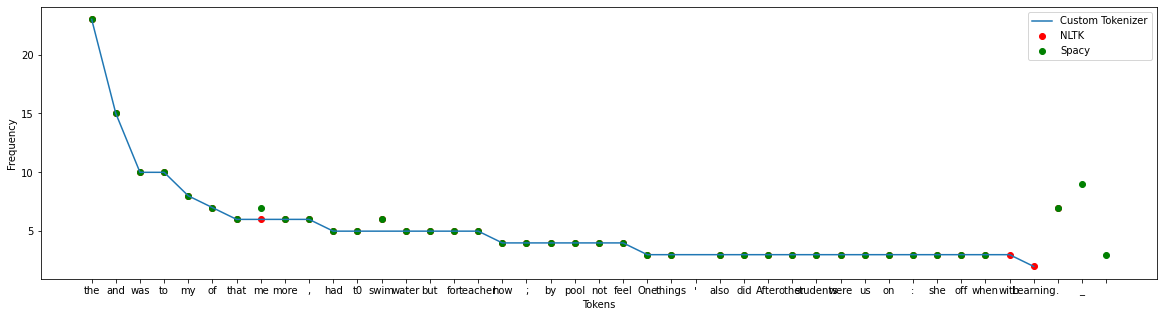

In [176]:
print("==============NLTK as grountTruth from GroundTruth File ==============")
precisionNLTK = calcPrecision(tokensCustom,tokensGroundNLTK)    
recallNLTK = calcRecall(tokensCustom, tokensGroundNLTK)
f1nltkEN = calcF1Score(precisionNLTK, recallNLTK)
print("F1 - Score = ",f1nltkEN)
print("==============SpaCy as grountTruth from GroundTruth File ==============")
precisionSpac = calcPrecision(tokensCustom, tokensGroundSpacy)    
recallSpac = calcRecall(tokensCustom, tokensGroundSpacy)
f1Spac = calcF1Score(precisionSpac, recallSpac)
print("F1 - Score = ",f1Spac)

print("==============NLTK as grountTruth==============")
precisionNLTK2 = calcPrecision(tokensCustom,tokensNLTK)    
recallNLTK2 = calcRecall(tokensCustom, tokensNLTK)
f1nltkEN2 = calcF1Score(precisionNLTK2, recallNLTK2)
print("F1 - Score = ",f1nltkEN2)
print("==============SpaCy as grountTruth==============")
precisionSpac2 = calcPrecision(tokensCustom, tokensSpacy)    
recallSpac2 = calcRecall(tokensCustom, tokensSpacy)
f1Spac2 = calcF1Score(precisionSpac2, recallSpac2)
print("F1 - Score = ",f1Spac2)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()



# precision = calcPrecision(tokensSpacy, groundTruthTokens)    
# recall = calcRecall(tokensSpacy, groundTruthTokens)
# f1spacyEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f1spacyEN)
# dic3 = FreqDist(tokensSpacy)
# filter_tokens3 = dict([(m, n) for m, n in dic3.items() if n == 1])
# observed1_3 = len(filter_tokens3)/len(dic3)
# top30_3 = FreqDist(tokensSpacy).most_common(30)
# top30_3Truth = FreqDist(groundTruthTokens).most_common(30)
# plt.figure(figsize=(15, 5))
# plt.plot(*zip(*top30_3),label='SpaCy en_core_web_sm')
# plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()



# precision = calcPrecision(customTokens, groundTruthTokens)    
# recall = calcRecall(customTokens, groundTruthTokens)
# f2custonEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f2custonEN)
# dic4 = FreqDist(customTokens)
# filter_tokens4 = dict([(m, n) for m, n in dic4.items() if n == 1])
# observed1_4 = len(filter_tokens4)/len(dic4)
# top30_4 = FreqDist(customTokens).most_common(30)
# top30_4Truth = FreqDist(groundTruthTokens).most_common(30)
# plt.figure(figsize=(15, 5))
# plt.plot(*zip(*top30_4),label='Custom Tokenizer')
# plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()

In [171]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed1_1,observed1_2,observed1_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer   │   Frequency = 1 (%) │
╞════╪═════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                      │            0.669456 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                   │            0.64557  │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                  │            0.672199 │
╘════╧═════════════════════════════════════════════════════════╧═════════════════════╛


In [178]:

info = {'Tokenizer': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN,f1Spac],
       'Precision':[precisionNLTK,precisionSpac],'Recall':[recallNLTK,recallSpac]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer            │   F1-Score │   Precision │   Recall │
╞════╪══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth  │   0.814433 │    0.88565  │ 0.753817 │
├────┼──────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth │   0.792864 │    0.896861 │ 0.71048  │
╘════╧══════════════════════╧════════════╧═════════════╧══════════╛


In [177]:
info = {'Tokenizer': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN2,f1Spac2],
       'Precision':[precisionNLTK2,precisionSpac2],'Recall':[recallNLTK2,recallSpac2]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer            │   F1-Score │   Precision │   Recall │
╞════╪══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth  │   0.978771 │    0.982063 │ 0.975501 │
├────┼──────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth │   0.945976 │    0.961883 │ 0.930586 │
╘════╧══════════════════════╧════════════╧═════════════╧══════════╛
